# Plotting

## Setup

In [2]:
#%matplotlib inline

import sqlite3
import numpy as np
import pandas as pd
#pd.options.display.mpl_style = 'default'
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

## Create DataFrame from SQL Query

In [3]:
connection = sqlite3.connect('../lahman2014.sqlite')

query = '''SELECT CAST(strftime('%Y', debut / 1000, 'unixepoch') as decimal)  year, avg(weight) weight
FROM master
WHERE debut is NOT NULL
GROUP BY year
ORDER BY year'''

df = pd.read_sql_query(query, connection, coerce_float=True, index_col="year")

In [21]:
df

,weight
year,
1900,174.526316
1901,172.596330
1902,173.756757
1903,171.896552
1904,171.034884
...,...
2010,210.935961
2011,207.736402
2012,207.417476


## Create Plot

Text(1990,205,'Steriods Era Ends')

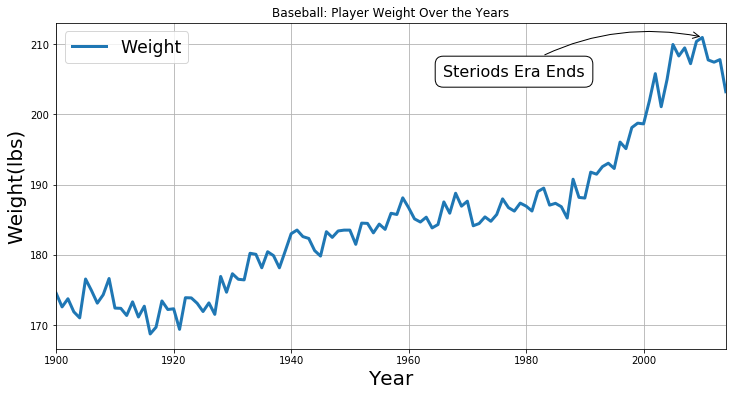

In [25]:
plt=df.plot(title="Baseball: Player Weight Over the Years",
            figsize=(12,6),
            lw = 3) 
           
plt.set_xlabel('Year',fontsize=20)
plt.set_ylabel('Weight(lbs)',fontsize=20)
plt.margins(x=0)
plt.legend(['Weight'],loc='upper left',fontsize='xx-large')
plt.grid(True)
plt.annotate(s='Steriods Era Ends',xy=(2010,211),xytext=(1990,205),bbox=dict(boxstyle='round,pad=0.5',fc='white',alpha=1),
            arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=-.2',color='black'),ha='right',va='bottom',fontsize=16)